In [82]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

# **Импорт датасета**

In [170]:
df = pd.read_csv('black_friday_sales.csv', sep=',')
df.head(4)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


In [171]:
df.tail(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [172]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [173]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None


In [174]:
exclude_columns = ['Product_ID']

predefined_categorical_columns = ['Marital_Status','Occupation','Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']
for col in predefined_categorical_columns:
  if col in df.columns and df[col].dtype != 'category':
    df[col] = df[col].astype('category')

df_obj_features = df.select_dtypes(include='category')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category_1          550068 non-null  int64   
 9   Product_Category_2          376430 non-null  float64 
 10  Product_Category_3          166821 non-null  float64 
 11  Purchase                    550068 non-null  int64   
dtypes: category(6), float64(2), int64(3), object(1)
memory usa

In [175]:
df = df.drop(columns=['User_ID', 'Product_ID'], errors='ignore')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   Gender                      550068 non-null  category
 1   Age                         550068 non-null  category
 2   Occupation                  550068 non-null  category
 3   City_Category               550068 non-null  category
 4   Stay_In_Current_City_Years  550068 non-null  category
 5   Marital_Status              550068 non-null  category
 6   Product_Category_1          550068 non-null  int64   
 7   Product_Category_2          376430 non-null  float64 
 8   Product_Category_3          166821 non-null  float64 
 9   Purchase                    550068 non-null  int64   
dtypes: category(6), float64(2), int64(2)
memory usage: 19.9 MB
None


# **Обработка пропусков (заменяем пропуски медианами)**

In [176]:
df.describe(include='all')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068,550068,550068.0,550068,550068,550068.0,550068.000000,376430.000000,166821.000000,550068.000000
unique,2,7,21.0,3,5,2.0,NaN,NaN,NaN,NaN
top,M,26-35,4.0,B,1,0.0,NaN,NaN,NaN,NaN
freq,414259,219587,72308.0,231173,193821,324731.0,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5.404270,9.842329,12.668243,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,3.936211,5.086590,4.125338,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,3.000000,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,9.000000,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,9.000000,14.000000,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,15.000000,16.000000,12054.000000


In [177]:
df.isna().sum()

,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638
Product_Category_3,383247
Purchase,0


In [178]:
medians = df[['Product_Category_2', 'Product_Category_3']].median()
medians

,0
Product_Category_2,9.0
Product_Category_3,14.0


In [179]:
df[['Product_Category_2', 'Product_Category_3']] = \
        df[['Product_Category_2', 'Product_Category_3']].fillna(medians)

In [180]:
df.isna().sum()

,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Product_Category_3,0
Purchase,0


In [181]:
df.describe()

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000
mean,5.404270,9.576434,13.596114,9263.968713
std,3.936211,4.226025,2.352863,5023.065394
min,1.000000,2.000000,3.000000,12.000000
25%,1.000000,8.000000,14.000000,5823.000000
50%,5.000000,9.000000,14.000000,8047.000000
75%,8.000000,14.000000,14.000000,12054.000000
max,20.000000,18.000000,18.000000,23961.000000


# **Обработка выбросов**

Найдем выбросы с помощью квантилей. Наблюдения, значения которых больше 95% квантиля и которые меньше 5% квантиля будем считать выбросами и заменять на медиану.


In [182]:
def outliers_processing(column):
    median = df[column].median()

    max_value = df[column].quantile(0.95)
    min_value = df[column].quantile(0.05)

    condition = (df[column] > max_value) | (df[column] < min_value)

    df.loc[condition, column] = median

In [183]:
outliers_processing("Purchase")

In [184]:
df.describe()

,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,550068.000000,550068.000000,550068.000000,550068.000000
mean,5.404270,9.576434,13.596114,8995.472034
std,3.936211,4.226025,2.352863,3992.596439
min,1.000000,2.000000,3.000000,1984.000000
25%,1.000000,8.000000,14.000000,6135.000000
50%,5.000000,9.000000,14.000000,8047.000000
75%,8.000000,14.000000,14.000000,11529.000000
max,20.000000,18.000000,18.000000,19336.000000


# **Визуализация**

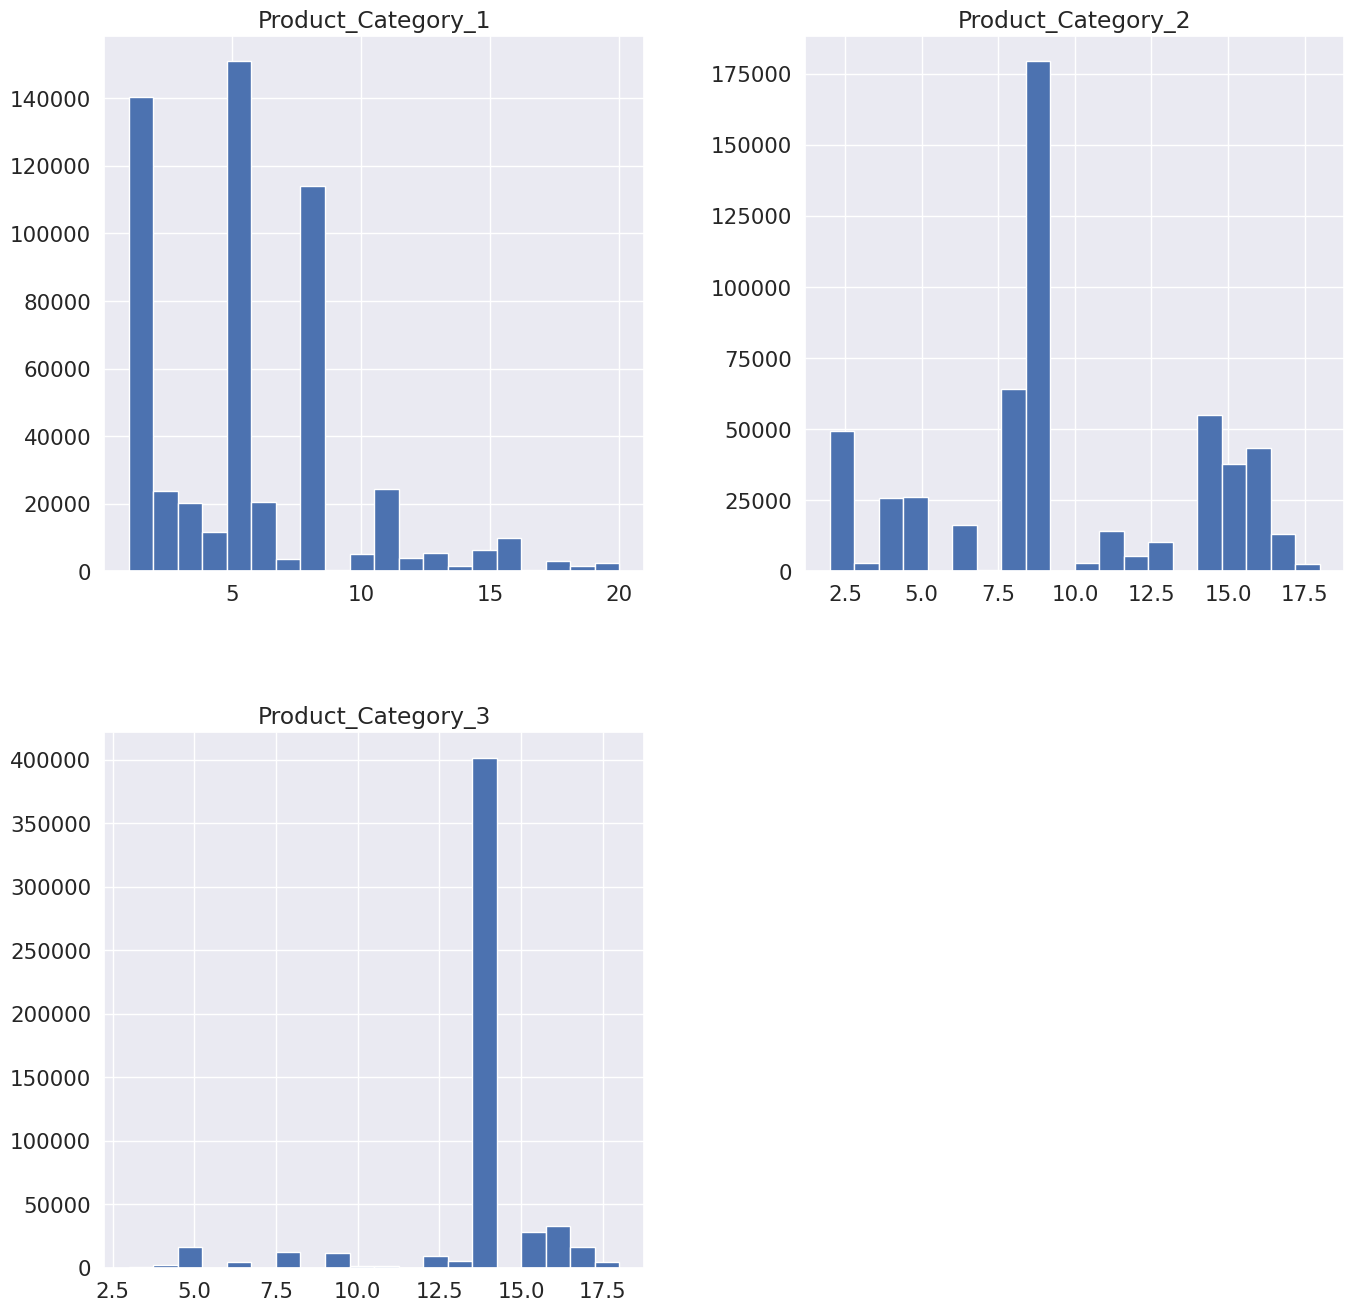

In [185]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.drop('Purchase', axis=1, inplace=True)
df_num_features.hist(figsize=(16,16), bins=20, grid=True);

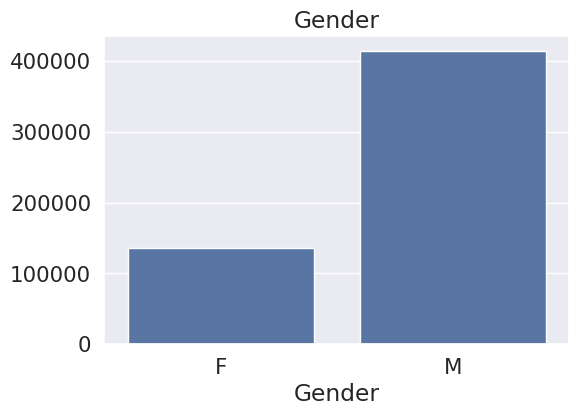

In [186]:
counts = df['Gender'].value_counts()

plt.figure(figsize=(6,4))
plt.title('Gender')
sns.barplot(x=counts.index, y=counts.values)

plt.show()

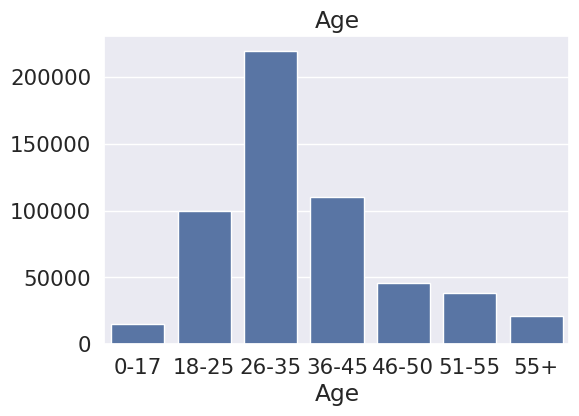

In [187]:
counts = df['Age'].value_counts()

plt.figure(figsize=(6,4))
plt.title('Age')
sns.barplot(x=counts.index, y=counts.values)

plt.show()

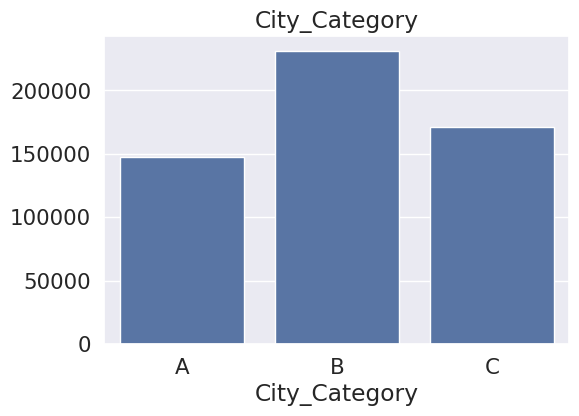

In [188]:
counts = df['City_Category'].value_counts()

plt.figure(figsize=(6,4))
plt.title('City_Category')
sns.barplot(x=counts.index, y=counts.values)

plt.show()

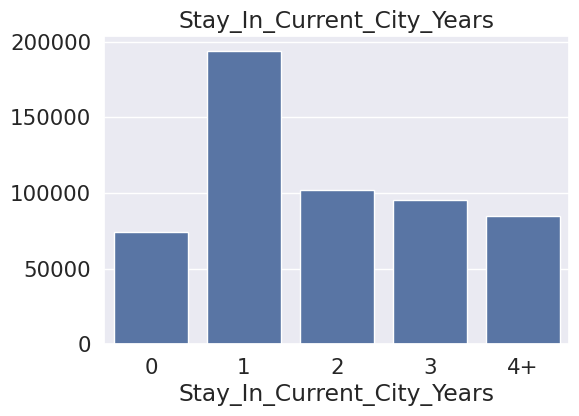

In [189]:
counts = df['Stay_In_Current_City_Years'].value_counts()

plt.figure(figsize=(6,4))
plt.title('Stay_In_Current_City_Years')
sns.barplot(x=counts.index, y=counts.values)

plt.show()

# **Изучения распределения целевой переменной**

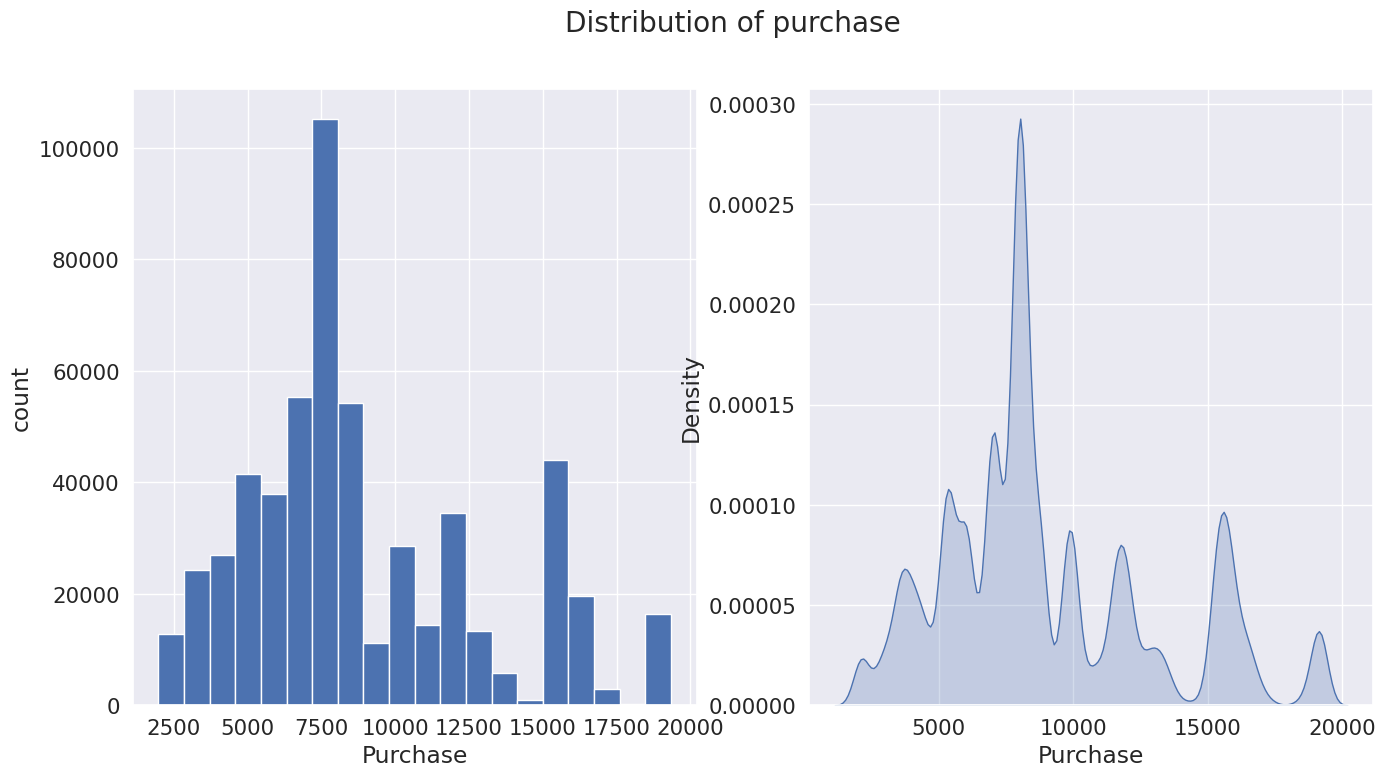

In [190]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Purchase'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Purchase')

plt.subplot(122)
sns.kdeplot(df['Purchase'], fill=True, legend=False)
plt.xlabel('Purchase')

plt.suptitle('Distribution of purchase')
plt.show()

In [191]:
target_mean = round(df['Purchase'].mean(), 2)
target_median = df['Purchase'].median()
target_mode = df['Purchase'].mode()[0]

In [192]:
df['Purchase'].value_counts()

,count
Purchase,
8047,55109
7011,191
7193,188
6855,187
6891,184
...,...
9020,1
5617,1
17328,1


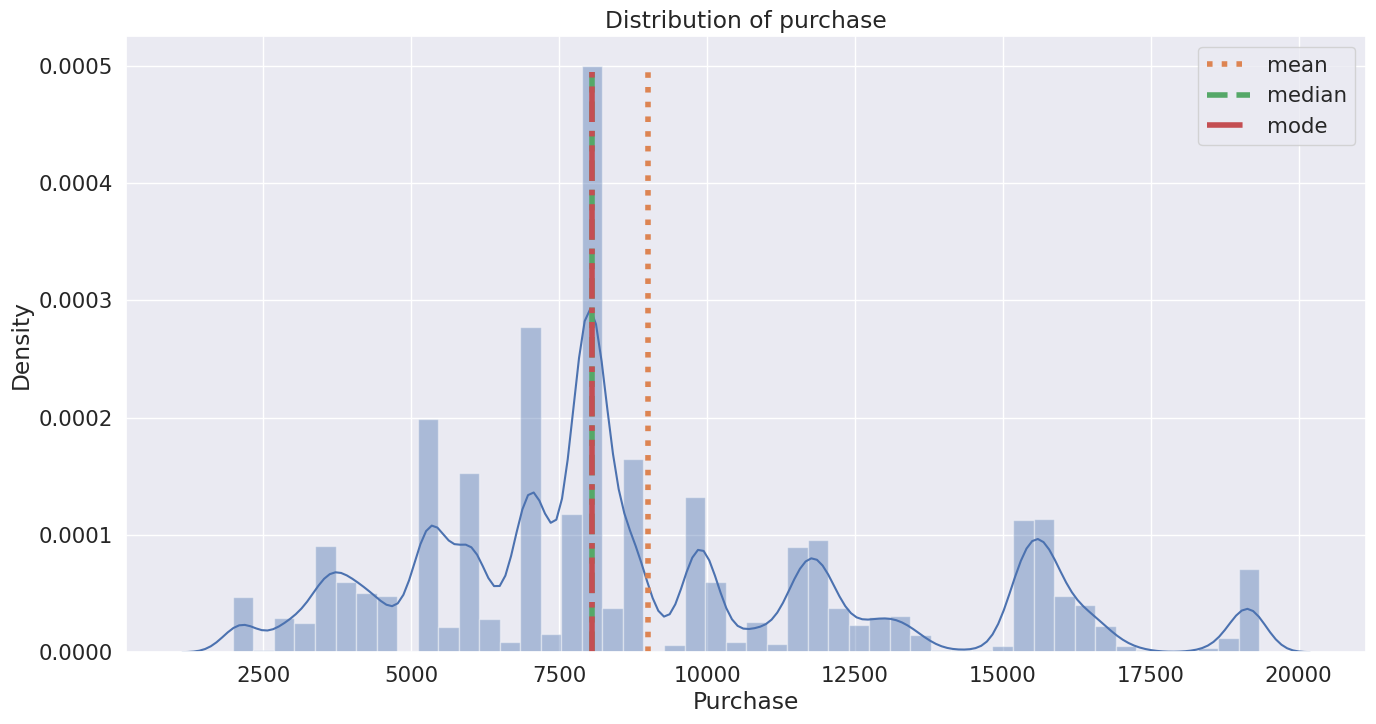

In [193]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Purchase'], bins=50)

y = np.linspace(0, 0.0005, 10)
plt.plot([target_mean] * 10, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 10, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 10, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of purchase')
plt.legend()
plt.show()

# **Изучение зависимости переменных друг от друга**

In [168]:
for col in df.select_dtypes(include=['category']).columns:
  if col not in exclude_columns:
    unique_values = df[col].nunique()

  df[col] = df[col].astype('category')

  if unique_values <= 10:
    df = pd.get_dummies(df, columns=[col], prefix=col)
  else:
    df[col] = df[col].cat.codes

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Occupation                     550068 non-null  int8   
 1   Product_Category_1             550068 non-null  int64  
 2   Product_Category_2             550068 non-null  float64
 3   Product_Category_3             550068 non-null  float64
 4   Purchase                       550068 non-null  int64  
 5   Gender_F                       550068 non-null  bool   
 6   Gender_M                       550068 non-null  bool   
 7   Age_0-17                       550068 non-null  bool   
 8   Age_18-25                      550068 non-null  bool   
 9   Age_26-35                      550068 non-null  bool   
 10  Age_36-45                      550068 non-null  bool   
 11  Age_46-50                      550068 non-null  bool   
 12  Age_51-55                     

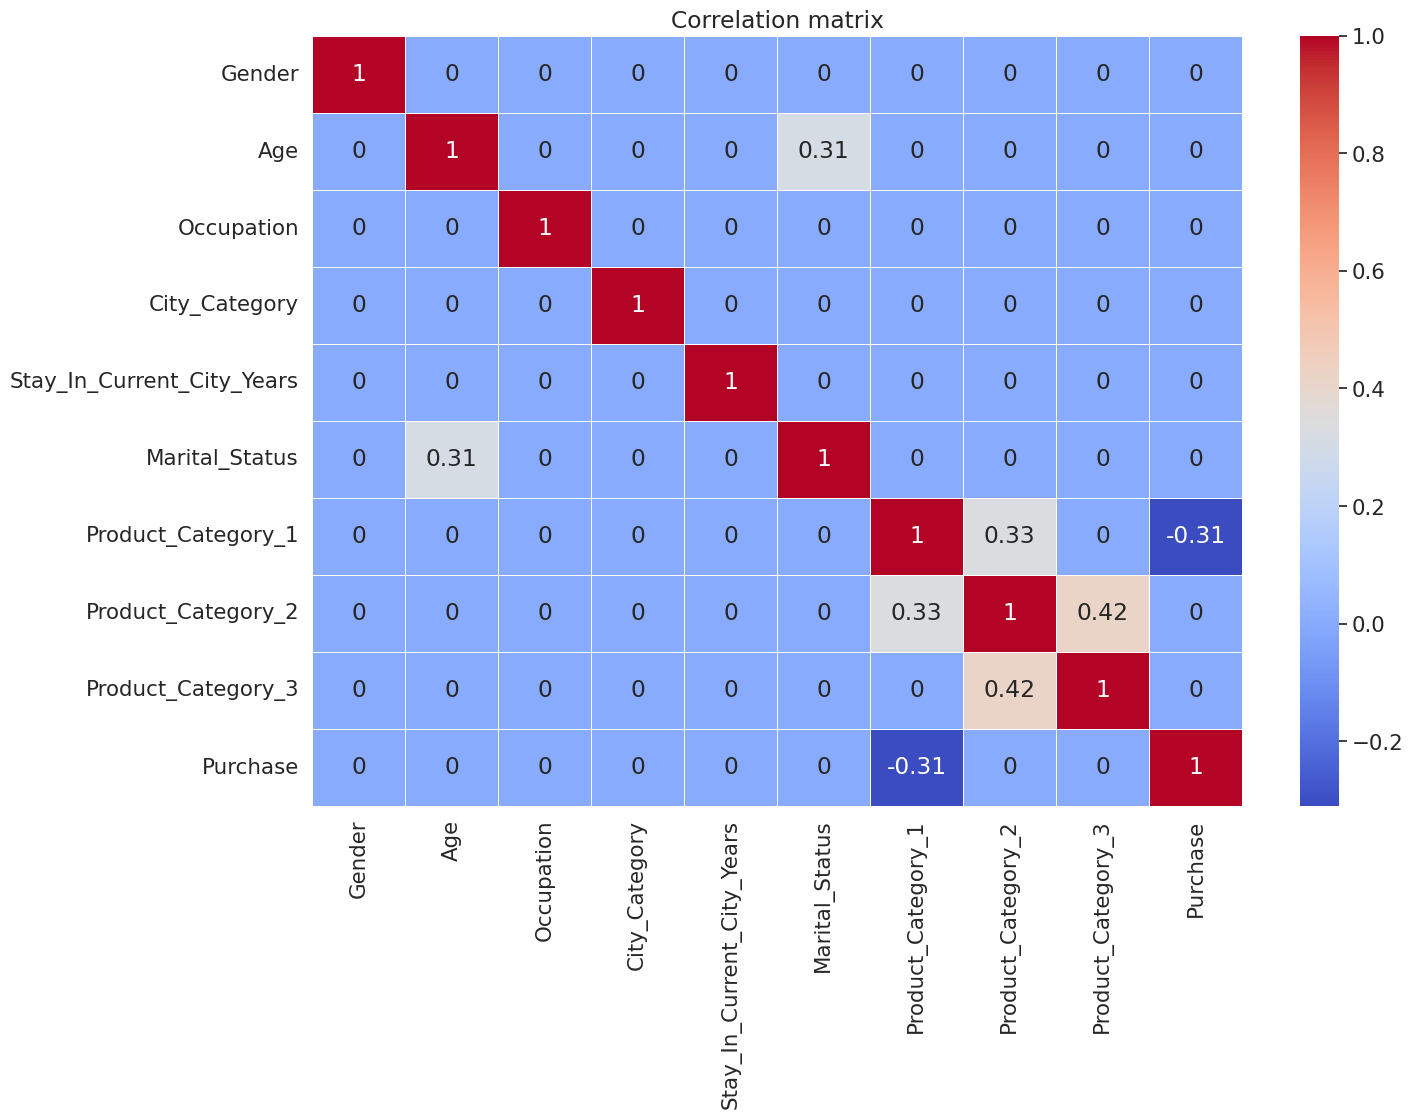

In [ ]:
corr_df = df.copy()
label_encoders = {}

for col in corr_df.select_dtypes(include=['category']).columns:
  le = LabelEncoder()
  corr_df[col] = le.fit_transform(corr_df[col].astype(str))
  label_encoders[col] = le

plt.figure(figsize = (15,10))

corr_matrix = corr_df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

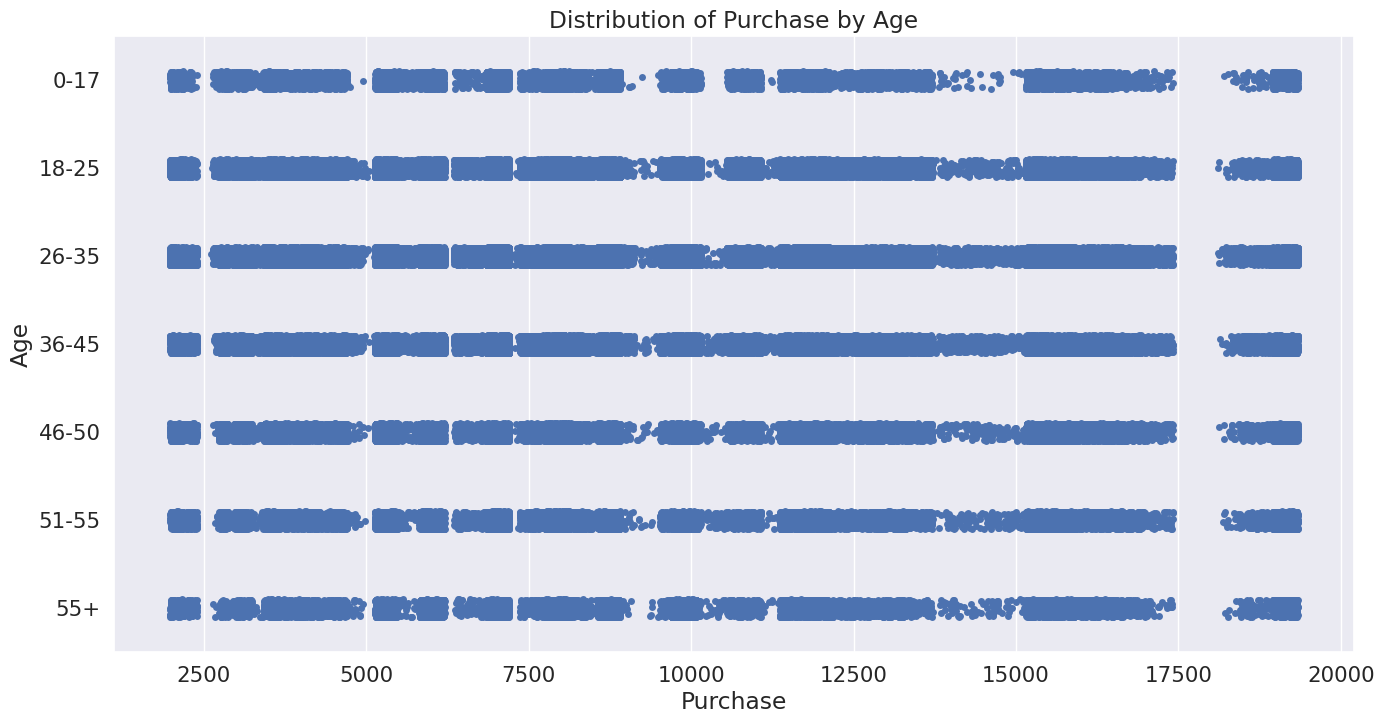

In [201]:
plt.figure(figsize=(16, 8))

sns.stripplot(x='Purchase', y='Age', data=df, jitter=True)
plt.xlabel('Purchase')
plt.ylabel('Age')
plt.title('Distribution of Purchase by Age')
plt.show()

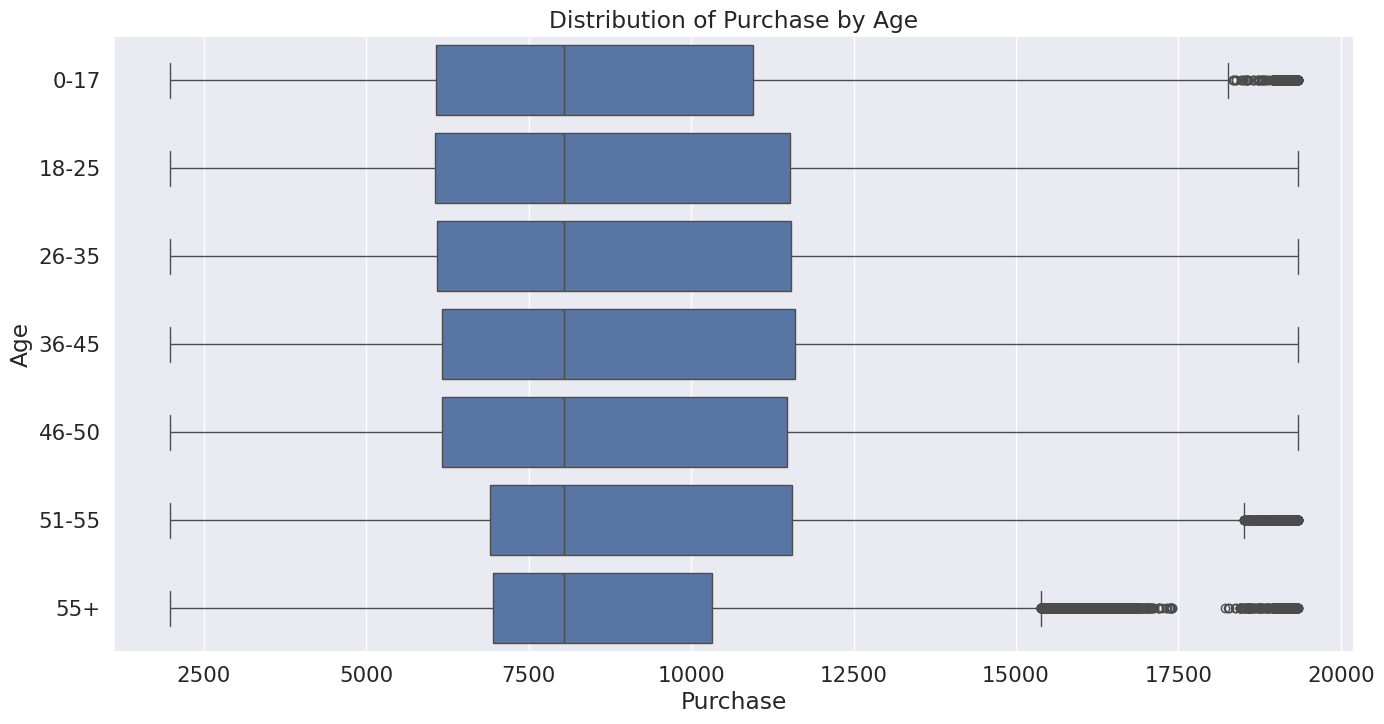

In [202]:
plt.figure(figsize=(16, 8))

sns.boxplot(x = df['Purchase'], y = df['Age'], data = df, whis=1.5)

plt.xlabel('Purchase')
plt.ylabel('Age')
plt.title('Distribution of Purchase by Age')
plt.show()

# **DataPipeline**

In [203]:
class DataPipeline:

    def __init__(self):
        self.medians = None
        self.categorical_columns = None

    def fit(self, df):

        # Расчет медиан
        self.medians = df[['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']].median()
        self.categorical_columns = ['Marital_Status','Occupation','Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

    def transform(self, df):

        # 1. Пропуски
        df[['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']] =\
            df[['Purchase', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']].fillna(self.medians)
        for column in self.categorical_columns:
            df[column].fillna(df[column].mode()[0], inplace=True)

        # 2. Выбросы (outliers)
        median = df['Purchase'].median()
        max_value = df['Purchase'].quantile(0.95)
        min_value = df['Purchase'].quantile(0.05)

        condition = (df['Purchase'] > max_value) | (df['Purchase'] < min_value)

        df.loc[condition, column] = median

        # 3. Новые фичи (features)

        # 4. Обработка категорий

        return df

In [204]:
df = pd.read_csv('black_friday_sales.csv')

pipe = DataPipeline()
pipe.fit(df)
df = pipe.transform(df)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,14.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,8047.0,0,12,9.0,14.0,1422
3,1000001,P00085442,F,0-17,10,A,8047.0,0,12,14.0,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,14.0,7969
